**Hand Gesture Recognition using K-Nearest Neighbours Classfier**

Dataset Used:[*Hand Gesture Recognition Database*](https://www.kaggle.com/benenharrington/hand-gesture-recognition-database-with-cnn)

Source: Kaggle

In [ ]:
#Mohit

import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import accuracy_score

In [ ]:
#Mohit

gestures = ['fist','index','ok','palm','thumb']
path = []
labels = []
numberList = ['1','2','3','4','5','6','7','8','9','10']
string = '/content/'
png = '.png'
for s in gestures:
  for i in range(10):
    string = string + s + numberList[i] +png
    path.append(string)
    labels.append(s)
    string = '/content/'

print(labels, end = "\n")
print(path)

['fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'index', 'index', 'index', 'index', 'index', 'index', 'index', 'index', 'index', 'index', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'palm', 'palm', 'palm', 'palm', 'palm', 'palm', 'palm', 'palm', 'palm', 'palm', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb', 'thumb']
['/content/fist1.png', '/content/fist2.png', '/content/fist3.png', '/content/fist4.png', '/content/fist5.png', '/content/fist6.png', '/content/fist7.png', '/content/fist8.png', '/content/fist9.png', '/content/fist10.png', '/content/index1.png', '/content/index2.png', '/content/index3.png', '/content/index4.png', '/content/index5.png', '/content/index6.png', '/content/index7.png', '/content/index8.png', '/content/index9.png', '/content/index10.png', '/content/ok1.png', '/content/ok2.png', '/content/ok3.png', '/content/ok4.png', '/content/ok5.png', '/content/ok6.png', '/content/ok7.png', '/cont

In [ ]:
#Samiksha
edge = []

for i in range(len(path)):
  img0 = cv2.imread(path[i])
  gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
  sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)  # x
  sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)  # y
  sob = sobelx + sobely
  edge.append(sob)


In [ ]:
#Trisha
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
#Trisha
# initialize the raw pixel intensities matrix
# and labels list
rawImages = []

# loop over the input images

for i in path:

	# reading the images
	image = cv2.imread(i)
 
	# extract raw pixel intensities
	pixels = image_to_feature_vector(image)
 
	# update the raw images matrices
	rawImages.append(pixels)

pixels_edge =[] 
for a in edge:
 temp = image_to_feature_vector(a)
 pixels_edge.append(temp)

#converting lists to np arrays
rawImages = np.array(rawImages)
labels = np.array(labels)
pixels_edge = np.array(pixels_edge)

#splitting the edge and without edge detected dataset into training and testing data

#Mohit and Trisha
X_train,X_test,y_train,y_test = train_test_split(rawImages,labels,test_size=0.2,random_state=4)
X1_train,X1_test,y1_train,y1_test = train_test_split(pixels_edge,labels,test_size=0.2,random_state=4)

#without edge detection
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


#with edge detection
mod = KNeighborsClassifier(n_neighbors=3)
mod.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The accuracy for images without edge detection is: 0.8


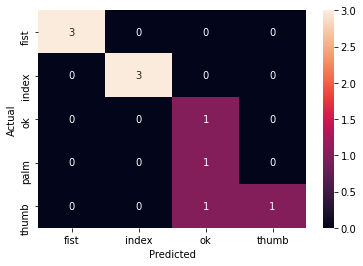

In [ ]:
#Samiksha
#without edge detection

y = model.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print("The accuracy for images without edge detection is:",accuracy_score(y_test,y))


The accuracy for images with edge detection is: 0.6


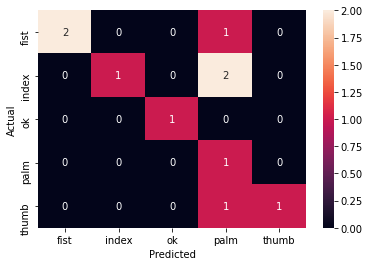

In [ ]:
#Samiksha
#with edge detection
y1 = mod.predict(X1_test)
confusion_matrix1 = pd.crosstab(y1_test,y1,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix1, annot=True)
print("The accuracy for images with edge detection is:",accuracy_score(y1_test,y1))